Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Импортируем необходимые библиотеки и методы

In [1]:
# импортируем библиотеки и методы
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

Зафиксируем `random_state`:

In [2]:
RANDOM_STATE = 1984

И отключим предупреждения:

In [3]:
import warnings

warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

### Прочитаем данные 

In [4]:
# откроем датасет либо локально, либо из интернета
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Познакомимся с данными:

In [5]:
display(df0.info())
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Построим кореяционную карту:

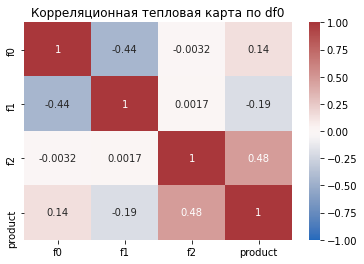

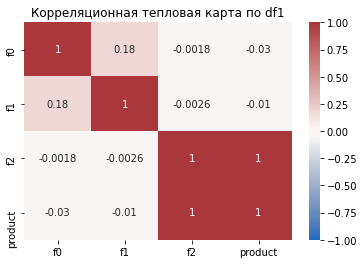

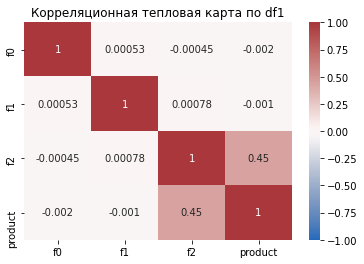

In [6]:
fig, ax = plt.subplots()
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Корреляционная тепловая карта по df0')
plt.show()

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Корреляционная тепловая карта по df1')
plt.show()

fig, ax = plt.subplots()
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Корреляционная тепловая карта по df1')
plt.show()

Со вторым датасетом явно что то не так, посмотрим чуть подробнее:

In [7]:
display(df0.describe())
display(df1.describe())
display(df2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим гистограммы по столбцу `product` в каждом регионе:

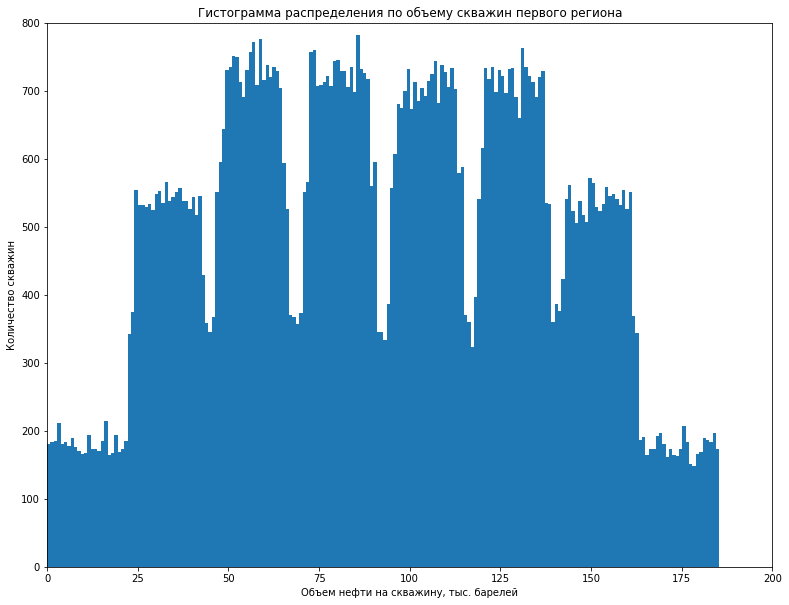

In [8]:
plt.figure(figsize=[13,10])
plt.hist(df0['product'], bins=200)

plt.xlim([0,200])
plt.ylim([0,800])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")

plt.title("Гистограмма распределения по объему скважин первого региона")
plt.show()

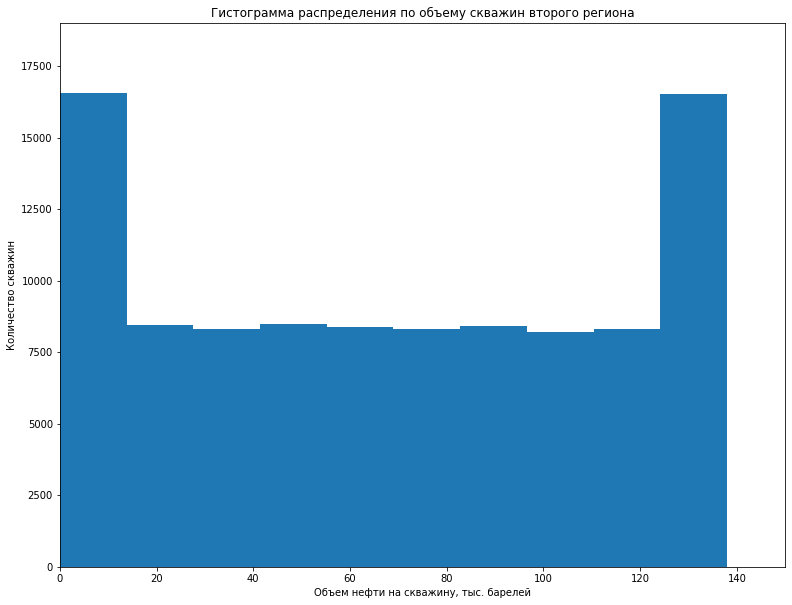

In [9]:
plt.figure(figsize=[13,10])
plt.hist(df1['product'], bins=10)

plt.xlim([0,150])
plt.ylim([0,19000])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")

plt.title("Гистограмма распределения по объему скважин второго региона")
plt.show()

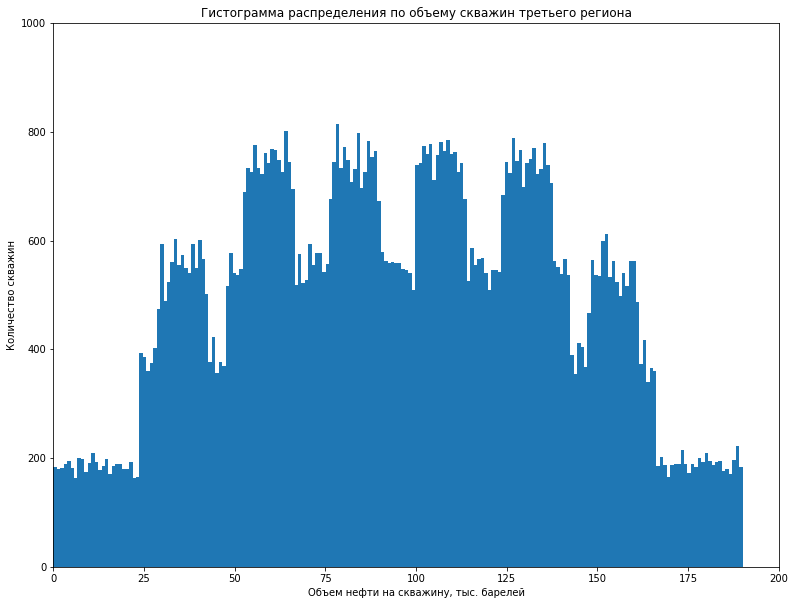

In [10]:
plt.figure(figsize=[13,10])
plt.hist(df2['product'], bins=200)

plt.xlim([0,200])
plt.ylim([0,1000])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")

plt.title("Гистограмма распределения по объему скважин третьего региона")
plt.show()

На лицо искуственность второго датасэта.

### Подготовим данные

Удалим неинформативный признак из каждого датафрейма - столбец `id`.

In [11]:
df0 = df0.drop(['id'], axis=1)
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)

### Вывод

Данные готовы к обучению.

К первому и третьему датасэту вопросов нет, а вот ко второму датасэту стоит отнестись аккуратней -  скорей всего он был введен искуственно.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Согласен, что колонка id нам не нужна. Радует, что распределения и корреляции были визуализированы!
</div>

## Обучение и проверка модели

Но сначала выделим признаки для модели:

In [12]:
# выделим признаки и целевой признак
features_0 = df0.drop('product', axis=1)
target_0 = df0['product']

features_1 = df1.drop('product', axis=1)
target_1 = df1['product']

features_2 = df2.drop('product', axis=1)
target_2 = df2['product']

 ### Разобьем данные на обучающую и валидационную выборки

In [13]:
# отделим обучающую и валидационную выборку
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=RANDOM_STATE)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=RANDOM_STATE)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=RANDOM_STATE)

### Стандартизируем признаки

In [14]:
#стандартизируем признаки
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()

scaler.fit(features_train_0[numeric])
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

### Обучитм модель и сделаем предсказания на валидационной выборке

Согласно условию задачи нам подходит только линейная регрессия, т. к. она достаточно предсказуема.

In [15]:
model = LinearRegression()

model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE модели первого региона -', 
      f'{mean_squared_error(target_valid_0, predicted_target_0)**0.5:.2f}')
print('Cредний запас предсказанного сырья первого региона -',
      f'{ predicted_target_0.mean():.2f}\n' )

model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE модели второго региона -', 
      f'{mean_squared_error(target_valid_1, predicted_target_1)**0.5:.2f}')
print('Cредний запас предсказанного сырья второго региона -',
      f'{ predicted_target_1.mean():.2f}\n')

model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE модели третьего региона -', 
      f'{mean_squared_error(target_valid_2, predicted_target_2)**0.5:.2f}')
print('Cредний запас предсказанного сырья третьего региона -',
      f'{ predicted_target_2.mean():.2f}')

RMSE модели первого региона - 37.70
Cредний запас предсказанного сырья первого региона - 92.47

RMSE модели второго региона - 0.89
Cредний запас предсказанного сырья второго региона - 68.69

RMSE модели третьего региона - 40.22
Cредний запас предсказанного сырья третьего региона - 94.83


Сравним предсказаный объем с реальным в каждом регионе:

In [16]:
print('Предсказанный запас в первом регионе:', f'{predicted_target_0.sum():.2f}')
print('Реальный запас в первом регионе:',f'{ target_valid_0.sum():.2f}')
print('Ошибка в предсказании в первом регионе на:',
      f'{abs(predicted_target_0.sum() - target_valid_0.sum()):.2f}\n')

print('Предсказанный запас во втором регионе:', f'{predicted_target_1.sum():.2f}')
print('Реальный запас во втором регионе:',f'{ target_valid_1.sum():.2f}')
print('Ошибка в предсказании во втором регионе на:',
      f'{abs(predicted_target_1.sum() - target_valid_1.sum()):.2f}\n')

print('Предсказанный запас в третьем регионе:', f'{predicted_target_2.sum():.2f}')
print('Реальный запас в третьем регионе:',f'{ target_valid_2.sum():.2f}')
print('Ошибка в предсказании в третьем регионе на:',
      f'{abs(predicted_target_2.sum() - target_valid_2.sum()):.2f}')

Предсказанный запас в первом регионе: 2311822.67
Реальный запас в первом регионе: 2314733.19
Ошибка в предсказании в первом регионе на: 2910.51

Предсказанный запас во втором регионе: 1717203.69
Реальный запас во втором регионе: 1717459.30
Ошибка в предсказании во втором регионе на: 255.61

Предсказанный запас в третьем регионе: 2370657.98
Реальный запас в третьем регионе: 2381689.42
Ошибка в предсказании в третьем регионе на: 11031.44


### Вывод

Лучшее предсказание модели во втором регионе **(RMSE - 0.89)** с ошибкой в **45.56 тыс. баррелей**.

Вероятной причиной этого скорей всего является то, что датасэт по второму региону был введен специально.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

## Подготовка к расчёту прибыли

### Ключевые значения 

Сохраним ключевые значения в отдельных переменных:

In [17]:
# бюджет на разработку скважин в регионе (10 милн тыс. руб), т.к. расчет в тыс. руб.
budget = 10000000 
# при разведке региона исследуют 500 точек
chosen_points = 500 
# из которых с помощью машинного обучения выбирали 200 лучших
best_points = 200
# цена за баррель нефти
price_per_barrel = 450

### Рассчет достаточного объёма нефти для безубыточной разработки новой скважины

Посчитаем требования к прибыли и объемам:

In [18]:
average_profit_per_point = budget / best_points
print('Средняя прибыль на скважину должна составлять:',
      f'{average_profit_per_point:.2f}, тыс. руб.')

average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Средний объем нефти на скважину должен составлять:',
      f'{average_barrels_per_point:.2f}, тыс. барелей')

average_barrels_per_region = budget / price_per_barrel
print('Средний объем нефти на регион должен составлять:',
      f'{average_barrels_per_region:.2f}, тыс. барелей')

Средняя прибыль на скважину должна составлять: 50000.00, тыс. руб.
Средний объем нефти на скважину должен составлять: 111.11, тыс. барелей
Средний объем нефти на регион должен составлять: 22222.22, тыс. барелей


Сравним полученный объём сырья со средним запасом в каждом регионе:

In [19]:
print('Фактический средний объем нефти на скважину в первом регионе:', df0['product'].mean())
print('Дефицит объема нефти на точку в регионе 1:', df0['product'].mean()-average_barrels_per_point)
print()
print('Фактический средний объем нефти на скважину во втором регионе:', df1['product'].mean())
print('Дефицит объема нефти на точку в регионе 2:', df1['product'].mean()-average_barrels_per_point)
print()
print('Фактический средний объем нефти на скважину в третьем регионе:', df2['product'].mean())
print('Дефицит объема нефти на точку в регионе 3:', df2['product'].mean()-average_barrels_per_point)

Фактический средний объем нефти на скважину в первом регионе: 92.50000000000001
Дефицит объема нефти на точку в регионе 1: -18.6111111111111

Фактический средний объем нефти на скважину во втором регионе: 68.82500000000002
Дефицит объема нефти на точку в регионе 2: -42.2861111111111

Фактический средний объем нефти на скважину в третьем регионе: 95.00000000000004
Дефицит объема нефти на точку в регионе 3: -16.11111111111107


<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

### Функция для расчёта прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели, но сначала приведем данные к типу Series:

In [20]:
# приведем данные к типу Series
target_valid_0 = target_valid_0.reset_index(drop=True)
predicted_target_0 = pd.Series(predicted_target_0)

target_valid_1 = target_valid_1.reset_index(drop=True)
predicted_target_1 = pd.Series(predicted_target_1)

target_valid_2 = target_valid_2.reset_index(drop=True)
predicted_target_2 = pd.Series(predicted_target_2)

In [21]:
# напишем функцию для расчёта прибыли
def oil_profit_calculation(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

In [22]:
print('Прибыль по первому региону:',
      f'{oil_profit_calculation(target_valid_0, predicted_target_0, best_points):.2f}, тыс. рублей')
print('Прибыль по второму региону:',
      f'{oil_profit_calculation(target_valid_1, predicted_target_1, best_points):.2f}, тыс. рублей')
print('Прибыль по третьему региону:',
      f'{oil_profit_calculation(target_valid_2, predicted_target_2, best_points):.2f}, тыс. рублей')

Прибыль по первому региону: 3059083.94, тыс. рублей
Прибыль по второму региону: 2415086.70, тыс. рублей
Прибыль по третьему региону: 2585877.67, тыс. рублей


### Выводы

Для безубыточной разработки новой скважины средний объем нефти на скважину должен составлять **111.11, тыс. барелей**. 

При этом шанс окупить затраты у второго региона меньше чем у остольных: **средний дефицит** объема нефти на скважину в этом регионе составляет **-42.29** тыс. барелей. 

Наибольшая прогнозируемая прибыль у первого региона: **3059083.94**, тыс. рублей.

## Расчёт прибыли и рисков 

Посчитайте риски и прибыль для каждого региона:
5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

### Bootstrap с 1000 выборок

Напишем функцию для `Bootstrap`:

In [23]:
state = np.random.RandomState(8800)
def bootstrap(target, probs):
    values=[]
    loss = 0
    for i in range(1000):
        target_sample = target.sample(n=chosen_points, replace=True, random_state=state)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            loss +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = loss / values.count()
    return average, lower, upper, risk

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

### Cредняя прибыль, 95%-й доверительный интервал и риск убытков

Применим функцию `bootstrap` и выведем среднюю прибыль, доверительный интервал и риск убытков для каждого региона:

In [24]:
average_0, lower_0, upper_0, risk_0 = bootstrap(target_valid_0, predicted_target_0)
print('Средняя прибыль в первом регионе составляет {:.2f} тыс.руб.'.format(average_0))
print('95%-й доверительный интервал первого региона от {:.2f} до {:.2f} тыс.руб.'
      .format(lower_0, upper_0))
print('Процент риска в первом регионе составляет {:.2%}\n'.format(risk_0))

average_1, lower_1, upper_1, risk_1 = bootstrap(target_valid_1, predicted_target_1)
print('Средняя прибыль во втором регионе составляет {:.2f} тыс.руб.'.format(average_1))
print('95%-й доверительный интервал второго региона от {:.2f} до {:.2f} тыс.руб.'
      .format(lower_1, upper_1))
print('Процент риска во втором регионе составляет {:.2%}\n'.format(risk_1))

average_2, lower_2, upper_2, risk_2 = bootstrap(target_valid_2, predicted_target_2)
print('Средняя прибыль в третьем регионе составляет {:.2f} тыс.руб.'.format(average_2))
print('95%-й доверительный интервал третьего региона от {:.2f} до {:.2f} тыс.руб.'
      .format(lower_2, upper_2))
print('Процент риска в третьем регионе составляет {:.2%}'.format(risk_2))

Средняя прибыль в первом регионе составляет 406921.36 тыс.руб.
95%-й доверительный интервал первого региона от -105929.91 до 897383.79 тыс.руб.
Процент риска в первом регионе составляет 6.40%

Средняя прибыль во втором регионе составляет 450685.97 тыс.руб.
95%-й доверительный интервал второго региона от 50186.84 до 869394.41 тыс.руб.
Процент риска во втором регионе составляет 1.40%

Средняя прибыль в третьем регионе составляет 389803.66 тыс.руб.
95%-й доверительный интервал третьего региона от -147471.66 до 891711.20 тыс.руб.
Процент риска в третьем регионе составляет 7.60%


### Вывод

По результатам подсчета рисков и прибыли лидером стал второй регион: средняя прибыль составит **450685.97 тыс.руб**, при этом риск минимальный, всего **1.40%**. 

Первый и третий регионы имеют достаточно высокий процент риска: **6.40%** и **7.60%** соответственно, что не удовлетворяет условию поставленной задачи (риски не должны превышать 2.50%).

## Выводы

По результатам знакомства с датасетами выявлена явная **синтетичность данных во втором регионе**.

После обучения модели выяснилось, что лучшая среднеквадратическая ошибка во втором регионе - **0.89**, при этом фактический средний объем нефти на скважину в регионе оказался самым низким: всего  **68.82** тыс. баррелей из прогнозируемого минимума в 111 тыс. баррелей.

Единственным регионом для разработки скважин оказался **второй регион**. Судя по доверительному интервалу можно сказать, что даже при не удачном выборе скважины - **разработка окупится**.

Главной особеностью проекта можно выделить ненормальное распределение данных во втором регионе, от чего наша функция расчета прибыли могла увести нас не в том направлении, но благодоря технике `Bootstrap` все стало на свои места.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта! С выбором региона согласен.
</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован